# Simple Linear Regression With scikit-learn

Let’s start with the simplest case, which is simple linear regression.

There are five basic steps when you’re implementing linear regression:

1. Import the packages and classes you need.
2. Provide data to work with and eventually do appropriate transformations.
3. Create a regression model and fit it with existing data.
4. Check the results of model fitting to know whether the model is satisfactory.
5. Apply the model for predictions.

These steps are more or less general for most of the regression approaches and implementations.

## Step 1: Imports

The first step is to import the package numpy and the class LinearRegression from sklearn.linear_model:

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression

Now, you have all the functionalities you need to implement linear regression.

The fundamental data type of NumPy is the array type called numpy.ndarray. The rest of this article uses the term array to refer to instances of the type numpy.ndarray.

The class sklearn.linear_model.LinearRegression will be used to perform linear and polynomial regression and make predictions accordingly.

## Step 2: Provide data

**Data Set Information:**
We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

**Attribute Information:**
The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

**Specifically:**
- X1 Relative Compactness
- X2 Surface Area
- X3 Wall Area
- X4 Roof Area
- X5 Overall Height
- X6 Orientation
- X7 Glazing Area
- X8 Glazing Area Distribution
- y1 Heating Load
- y2 Cooling Load

In [10]:
import pandas as pd
mydata = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx")

In [11]:
mydata.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

Text(0, 0.5, 'y')

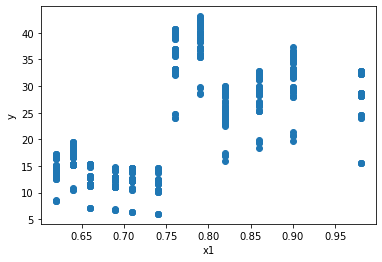

In [12]:
import matplotlib.pyplot as plt
plt.scatter(mydata.X1, mydata.Y1)
plt.xlabel('x1')
plt.ylabel('y')

In [13]:
x = np.array(mydata.X1).reshape((-1, 1))
y = np.array(mydata.Y1)

Now, you have two arrays: the input x and output y. You should call .reshape() on x because this array is required to be two-dimensional, or to be more precise, to have one column and as many rows as necessary. That’s exactly what the argument (-1, 1) of .reshape() specifies.

## Step 3: Create a model and fit it

This statement creates the variable model as the instance of LinearRegression. You can provide several optional parameters to LinearRegression:

- fit_intercept is a Boolean (True by default) that decides whether to calculate the intercept 𝑏₀ (True) or consider it equal to zero (False).
- normalize is a Boolean (False by default) that decides whether to normalize the input variables (True) or not (False).
- copy_X is a Boolean (True by default) that decides whether to copy (True) or overwrite the input variables (False).
- n_jobs is an integer or None (default) and represents the number of jobs used in parallel computation. None usually means one job and -1 to use all processors.
This example uses the default values of all parameters.

In [14]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

With .fit(), you calculate the optimal values of the weights 𝑏₀ and 𝑏₁, using the existing input and output (x and y) as the arguments. In other words, .fit() fits the model.

## Step 4: Get results

In [15]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.3872223619321592
intercept: -23.053014060655016
slope: [59.35905261]


When you’re applying .score(), the arguments are also the predictor x and regressor y, and the return value is 𝑅².
The code above illustrates how to get 𝑏₀ and 𝑏₁. You can notice that .intercept_ is a scalar, while .coef_ is an array.

## Step 5: Predict response

In [16]:
y_pred = model.predict([[0.8],[0.9],[1.0]])
print('predicted response:', y_pred, sep='\n')

predicted response:
[24.43422803 30.37013329 36.30603855]


# Linier Regression With Keras Tansorflow

In [17]:
import tensorflow as tf
import keras

## Step 1: Define and Compile the Neural Network

Next we will create the simplest possible neural network. It has 1 layer, and that layer has 1 neuron, and the input shape to it is just 1 value.

In [18]:
model2 = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model2.compile(optimizer='sgd', loss='mean_squared_error')
model2.fit(x, y, epochs=2000, verbose=0)

## Step 2: Obtain Parameters/weights

In [19]:
model2.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[59.273663]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-23.040773], dtype=float32)>]

## Step 3: Predict response

In [20]:
print(model2.predict([[0.8],[0.9],[1.0]]))

[[24.378157]
 [30.305521]
 [36.232887]]


# Advanced Linear Regression With statsmodels

You can implement linear regression in Python relatively easily by using the package statsmodels as well. Typically, this is desirable when there is a need for more detailed results.

The procedure is similar to that of scikit-learn.

In [21]:
# import library
import statsmodels.api as sm

# add column of one
xwithone = sm.add_constant(x)

You need to add the column of ones to the inputs if you want statsmodels to calculate the intercept 𝑏₀. It doesn’t takes 𝑏₀ into account by default. That’s how you add the column of ones to x with add_constant(). It takes the input array x as an argument and returns a new array with the column of ones inserted at the beginning.

In [22]:
# Create a model and fit it
model3 = sm.OLS(y, xwithone)
results = model3.fit()

You should be careful here! Please, notice that the first argument is the output, followed with the input. There are several more optional parameters.

By calling .fit(), you obtain the variable results, which is an instance of the class statsmodels.regression.linear_model.RegressionResultsWrapper. This object holds a lot of information about the regression model.

In [23]:
# Get results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     484.0
Date:                Sun, 24 Oct 2021   Prob (F-statistic):           1.59e-83
Time:                        22:11:51   Log-Likelihood:                -2676.5
No. Observations:                 768   AIC:                             5357.
Df Residuals:                     766   BIC:                             5366.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.0530      2.081    -11.076      0.0

## Multiple Linear Regression With statmodels

In [24]:
# define new data
X = mydata[["X1","X2","X3","X4","X5","X6","X7","X8"]].to_numpy()
Xwithone = sm.add_constant(X)

# Create a model and fit it
model4 = sm.OLS(y, Xwithone)
results = model4.fit()

# Get results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1187.
Date:                Sun, 24 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:11:51   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3841.
Df Residuals:                     760   BIC:                             3878.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.0134     19.034      4.414      0.0

## Detecting Multicollinearity with VIF

In [25]:
# import library
from statsmodels.stats.outliers_influence import variance_inflation_factor

Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor (VIF).

In [26]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = mydata.drop(["X1","X2","X3","X6","Y1","Y2"], axis=1).columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(mydata.drop(["X1","X2","X3","X6","Y1","Y2"], axis=1).values, i)
                          for i in range(len(mydata.drop(["X1","X2","X3","X6","Y1","Y2"], axis=1).columns))]
                          
print(vif_data)

  feature       VIF
0      X4  5.245242
1      X5  4.544944
2      X7  4.284222
3      X8  4.485473


## Multiple Linear Regression Model After Droping Multicollinearity Variables

we drop variables of X1,X2,X3, and X6

In [27]:
# define new data
Xclean = mydata[["X4","X5","X7","X8"]].to_numpy()
Xclean = sm.add_constant(Xclean)

# Create a model and fit it
model4 = sm.OLS(y, Xclean)
results = model4.fit()

# Get results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 24 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:11:51   Log-Likelihood:                -2095.5
No. Observations:                 768   AIC:                             4201.
Df Residuals:                     763   BIC:                             4224.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.8501      3.969     -3.490      0.0

# ---------- Continue ----------

## Principal Components (PC) Regression with scikit-learn

Principal Component Analysis (PCA) is one of famous techniqeus for dimension reduction, feature extraction, and data visualization. In general, PCA is defined by a transformation of a high dimensional vector space into a low dimensional space. Let's consider visualization of 10-dim data. It is barely possible to effectively show the shape of such high dimensional data distribution. PCA provides an efficient way to reduce the dimensionalty (i.e., from 10 to 2), so it is much easier to visualize the shape of data distribution. PCA is also useful in the modeling of robust classifier where considerably small number of high dimensional training data is provided. By reducing the dimensions of learning data sets, PCA provides an effective and efficient method for data description and classification.

**https://www.projectrhea.org/rhea/index.php/PCA_Theory_Examples**

**http://www.dsc.ufcg.edu.br/~hmg/disciplinas/posgraduacao/rn-copin-2014.3/material/SignalProcPCA.pdf**

![](https://miro.medium.com/max/922/1*m843SG1jDfU9-DLx-y34LQ.gif)

First, we’ll import the necessary packages to perform principal components regression (PCR) in Python:

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

However, when the predictor variables are highly correlated then multicollinearity can become a problem. This can cause the coefficient estimates of the model to be unreliable and have high variance.

One way to avoid this problem is to instead use principal components regression, which finds M linear combinations (known as “principal components”) of the original p predictors and then uses least squares to fit a linear regression model using the principal components as predictors.

This tutorial provides a step-by-step example of how to perform principal components regression in Python.

## Standardize the Data
PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. If you want to see the negative effect not scaling your data can have, scikit-learn has a section on the effects of not standardizing your data.

![](https://clavelresearch.files.wordpress.com/2019/03/z-score-population.png)

In [29]:
# Standardizing the features
X = mydata[["X1","X2","X3","X4","X5","X6","X7","X8"]].to_numpy()
x_std = StandardScaler().fit_transform(X)
x_std[0:5,:]

array([[ 2.04177671, -1.78587489, -0.56195149, -1.47007664,  1.        ,
        -1.34164079, -1.76044698, -1.81457514],
       [ 2.04177671, -1.78587489, -0.56195149, -1.47007664,  1.        ,
        -0.4472136 , -1.76044698, -1.81457514],
       [ 2.04177671, -1.78587489, -0.56195149, -1.47007664,  1.        ,
         0.4472136 , -1.76044698, -1.81457514],
       [ 2.04177671, -1.78587489, -0.56195149, -1.47007664,  1.        ,
         1.34164079, -1.76044698, -1.81457514],
       [ 1.28497917, -1.22923856,  0.        , -1.19867787,  1.        ,
        -1.34164079, -1.76044698, -1.81457514]])

## Eigen Values & Eigen Vectors


In linear algebra, an eigenvector or characteristic vector of a linear transformation is a nonzero vector that changes at most by a scalar factor when that linear transformation is applied to it. The corresponding eigenvalue, often denoted by lambda , is the factor by which the eigenvector is scaled.

![](http://www.sharetechnote.com/image/EngMath_Matrix_Eigen_Eq_02.PNG)

We need to make the covariance matrix when we are doing eigendecomposition. For those who are not familiar with eigendecomposition, you can check this out: Eigendecomposition and PCA (**https://www.youtube.com/watch?v=-1iULsGndG8**), this video explains the role of the covariance in eigendecomposition thoroughly.

**https://www.mathsisfun.com/algebra/eigenvalue.html**

**https://www.youtube.com/watch?v=FgakZw6K1QQ&t=38s**

**https://www.youtube.com/watch?v=G4N8vJpf7hM**

In [30]:
# Construct the covariance matrix.
cov_mat = np.cov(x_std.T)

# From this covariance matrix, caluclate the Eigenvalues and the Eigenvectors
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# print the Eigenvalues
print("Raw Eigenvalues: \n", eigen_vals)
# the sum of the Eigenvalues 
print("Percentage of Variance Explained by Each Component: \n", eigen_vals/sum(eigen_vals))

Raw Eigenvalues: 
 [3.70776711e+00 1.24146781e+00 5.28226666e-02 4.46132201e-03
 3.94815168e-15 1.21454566e+00 1.00130378e+00 7.88061902e-01]
Percentage of Variance Explained by Each Component: 
 [4.62867411e-01 1.54981414e-01 6.59423589e-03 5.56939125e-04
 4.92876358e-16 1.51620528e-01 1.25000000e-01 9.83794724e-02]


Sorting the eigenvalues by decreasing order to rank the eigenvectors and cumulate them to figure out how many PCs are we going to use.

In [31]:
# let's look at the cumulative variance described by each component
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([0.46286741, 0.61784882, 0.76946935, 0.89446935, 0.99284882,
       0.99944306, 1.        , 1.        ])

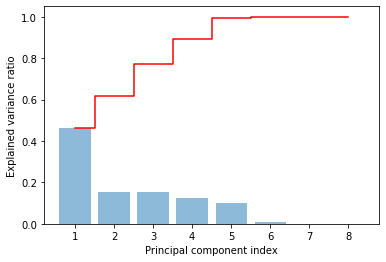

In [32]:
# make a bar plot of the variance associated with each component
plt.bar(range(1,9), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,9), cum_var_exp, where='mid', label='Cumulative explained variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.show()

## PCA using sklearn
After learning the steps of PCA, we can let sklearn to do the tedious and elaborate work

sklearn var:
 [4.62867411e-01 1.54981414e-01 1.51620528e-01 1.25000000e-01
 9.83794724e-02 6.59423589e-03 5.56939125e-04 2.06690401e-32]


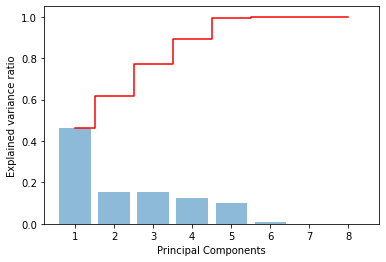

In [33]:
from sklearn.decomposition import PCA

pca = PCA()

# fit_transform() is used to calculate the PCAs from training data
X_pca = pca.fit_transform(x_std)

# to get the fit statistics (variance explained per component)
print("sklearn var:\n", pca.explained_variance_ratio_)

# like we did above visualize the PCs 
# and the cumulative variance explained by each PC
plt.bar(range(1,9), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1,9), np.cumsum(pca.explained_variance_ratio_), where='mid', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Components')
plt.show()

In [34]:
# Function of each component
np.around(pca.components_,5)

array([[ 0.49595, -0.50173,  0.03251, -0.50496,  0.49624,  0.     ,
         0.     ,  0.     ],
       [-0.24473,  0.23154,  0.89429, -0.20612,  0.21036,  0.     ,
        -0.     ,  0.     ],
       [-0.     , -0.     , -0.     , -0.     , -0.     , -0.     ,
        -0.70711, -0.70711],
       [ 0.     ,  0.     ,  0.     ,  0.     ,  0.     , -1.     ,
         0.     , -0.     ],
       [ 0.     , -0.     , -0.     ,  0.     ,  0.     , -0.     ,
        -0.70711,  0.70711],
       [ 0.49517, -0.06621,  0.29112, -0.20516, -0.78967,  0.     ,
         0.     ,  0.     ],
       [-0.67003, -0.50488, -0.08744, -0.4501 , -0.29311, -0.     ,
         0.     ,  0.     ],
       [-0.     ,  0.65982, -0.32679, -0.67664, -0.     , -0.     ,
        -0.     ,  0.     ]])

**PC1 = 0.49595 X1 -0.50173 X2 + 0.03251 X3 -0.50496 X4 + ..... + 0.000 X8**

**PC2 = -0.24473 X1 + 0.23154 X2 + 0.89429 X3 -0.20612 X4 + ..... + 0.000 X8**

**etc....**

In [35]:
# New Features
X_pca

array([[ 3.12895415e+00, -9.02373432e-01,  2.52792238e+00, ...,
         4.77611838e-01, -4.86937592e-02,  1.06699595e-14],
       [ 3.12895415e+00, -9.02373432e-01,  2.52792238e+00, ...,
         4.77611838e-01, -4.86937592e-02, -4.81727843e-16],
       [ 3.12895415e+00, -9.02373432e-01,  2.52792238e+00, ...,
         4.77611838e-01, -4.86937592e-02, -2.77463239e-15],
       ...,
       [-2.40682619e+00,  1.28785724e+00, -1.87764103e+00, ...,
         1.39126500e-01, -1.13649220e-01, -4.76509499e-17],
       [-2.40682619e+00,  1.28785724e+00, -1.87764103e+00, ...,
         1.39126500e-01, -1.13649220e-01, -2.95016815e-17],
       [-2.40682619e+00,  1.28785724e+00, -1.87764103e+00, ...,
         1.39126500e-01, -1.13649220e-01, -1.13524131e-17]])

In [36]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8"]
  
# calculating VIF for each component
vif_data["VIF"] = [variance_inflation_factor(X_pca, i)
                          for i in range(8)]
                          
print(vif_data)

  feature  VIF
0     PC1  1.0
1     PC2  1.0
2     PC3  1.0
3     PC4  1.0
4     PC5  1.0
5     PC6  1.0
6     PC7  1.0
7     PC8  1.0


## Estimate Principal Component Regression with Scikit-learn 

In [37]:
# PC Regression using Scikit-learn
model = LinearRegression()
model.fit(X_pca, y)

# Summary
r_sq = model.score(X_pca, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.9162021649454063
intercept: 22.3071953125
slope: [ 4.16693352e+00  3.80271374e+00 -2.09979943e+00  2.60839659e-02
 -1.65312880e+00 -7.87243710e+00  6.09650035e+00 -2.10625862e-28]


**Y = 22.3071953125 + 4.1669 PC1 + 3.8027 PC2 -2.0998 PC3 + .... + 0.000 PC8** 

## Estimate Principal Component Regression with Statmodels 

In [38]:
## Estimate Principal Component Regression
Xwithone_pca = sm.add_constant(X_pca)

# Create a model and fit it
model4 = sm.OLS(y, Xwithone_pca)
results = model4.fit()

# Get results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1187.
Date:                Sun, 24 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:11:52   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3841.
Df Residuals:                     760   BIC:                             3878.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.3072      0.106    210.678      0.0

## LASSO (L1) Regression with scikit-learn

What is Regularization?
In a general manner, to make things regular or acceptable is what we mean by the term regularization. This is exactly why we use it for applied machine learning. In the domain of machine learning, regularization is the process which prevents overfitting by discouraging developers learning a more complex or flexible model, and finally, which regularizes or shrinks the coefficients towards zero. The basic idea is to penalize the complex models i.e. adding a complexity term in such a way that it tends to give a bigger loss for evaluating complex models.

There are mainly two types of regularization techniques, namely **Lasso Regression (L1 Regularization)** and **Ridge Regression (L2 Regularization)** . The way they assign a penalty to β (coefficients) is what differentiates them from each other.

Lasso Regression (L1 Regularization). This regularization technique performs L1 regularization. Unlike Ridge Regression, it modifies the RSS by adding the penalty (shrinkage quantity) equivalent to the sum of the absolute value of coefficients.

Looking at the equation below, we can observe that similar to Ridge Regression, Lasso (**Least Absolute Shrinkage and Selection Operator**) also penalizes the absolute size of the regression coefficients. In addition to this, it is quite capable of reducing the variability and improving the accuracy of linear regression models.

![av](https://excelrcom.b-cdn.net/assets/admin/ckfinder/userfiles/images/2020%20uploads/13/2.PNG)

- If the number of predictors (p) is greater than the number of observations (n), Lasso will pick at most n predictors as non-zero, even if all predictors are relevant (or may be used in the test set). In such cases, Lasso sometimes really has to struggle with such types of data.
- If there are two or more highly collinear variables, then LASSO regression select one of them which is not good for the interpretation of data.

Lasso regression differs from ridge regression in a way that it uses absolute values within the penalty function, rather than that of squares. This leads to penalizing (or equivalently constraining the sum of the absolute values of the estimates) values which causes some of the parameter estimates to turn out exactly zero. The more penalty is applied, the more the estimates get shrunk towards absolute zero. This helps to variable selection out of given range of n variables.

In [39]:
# Import library
from sklearn.linear_model import ElasticNet, Ridge, Lasso

In [40]:
# Define model
lasso = Lasso(alpha=0.1)

# Fit the Lasso model
lasso.fit(X, y)

# Calculate model score (R square)
print("R Square:", lasso.score(X, y))

# Lasso Coeficients
print("Intercept:", lasso.intercept_)
print("Slope:", lasso.coef_)

R Square: 0.9055917500306943
Intercept: -25.671999350888107
Slope: [-0.00000000e+00  4.01453926e-03  4.81692259e-02 -0.00000000e+00
  4.92842241e+00 -0.00000000e+00  1.41309347e+01  2.68281344e-01]


## Estimate LASSO Regression using optimum Alpha

In [41]:
# Call function
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import KFold, GridSearchCV

### Using GridSearchCV

In [42]:
# define model
model = Lasso(max_iter = 5000)
# define model evaluation method
cv = KFold(n_splits=10, shuffle=True, random_state=1)
# define grid
grid = {'alpha': [0.1,0.2,0.3,0.4,0.5]}
# define search
search = GridSearchCV(model, grid, scoring="neg_root_mean_squared_error", cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Neg. RMSE : %.3f' % results.best_score_)
print('Config best %s' % results.best_params_)

Neg. RMSE : -3.096
Config best {'alpha': 0.1}


In [43]:
r_sq = results.best_estimator_.score(X, y)
print('coefficient of determination:', r_sq)
print('intercept:',results.best_estimator_.intercept_)
print('slope:')
np.round(results.best_estimator_.coef_,3)

coefficient of determination: 0.9055917500306943
intercept: -25.671999350888107
slope:


array([-0.0000e+00,  4.0000e-03,  4.8000e-02, -0.0000e+00,  4.9280e+00,
       -0.0000e+00,  1.4131e+01,  2.6800e-01])

### Using RidgeCV function

In [44]:
# define evaluation method of the model
model_lasso = LassoCV(alphas = [0.1,0.2,0.3,0.4,0.5], cv=cv, max_iter = 3000).fit(X, y)
model_lasso.score(X, y)
print('Alpha:', model_lasso.alpha_)
print('intercept:',model_lasso.intercept_)
print('slope:')
np.round(model_lasso.coef_,3)

Alpha: 0.1
intercept: -25.671999350888107
slope:


array([-0.0000e+00,  4.0000e-03,  4.8000e-02, -0.0000e+00,  4.9280e+00,
       -0.0000e+00,  1.4131e+01,  2.6800e-01])

## Ridge (L2) Regression with scikit-learn

Ridge Regression (L2 Regularization). This technique performs L2 regularization. The main algorithm behind this is to modify the RSS by adding the penalty which is equivalent to the square of the magnitude of coefficients. However, it is considered to be a technique used when the info suffers from multicollinearity (independent variables are highly correlated). In multicollinearity, albeit the smallest amount squares estimates (OLS) are unbiased, their variances are large which deviates the observed value faraway from truth value. By adding a degree of bias to the regression estimates, ridge regression reduces the quality errors. It tends to solve the multicollinearity problem through shrinkage parameter λ. Now, let us have a look at the equation below.

![av](https://excelrcom.b-cdn.net/assets/admin/ckfinder/userfiles/images/2020%20uploads/13/1.PNG)

In this equation, we have two components. The foremost one denotes the least square term and later one is lambda of the summation of β2 (beta- square) where β is the coefficient. This is added to least square term so as to shrink the parameter to possess a really low variance.

Every technique has some pros and cons, so as Ridge regression. It decreases the complexity of a model but does not reduce the number of variables since it never leads to a coefficient tending to zero rather only minimizes it. Hence, this model is not a good fit for feature reduction.

In [45]:
# define model
model = Ridge()
# define model evaluation method
cv = KFold(n_splits=10, shuffle=True, random_state=1)
# define grid
grid = {'alpha': [0.1,0.2,0.3,0.4,0.5]}
# define search
search = GridSearchCV(model, grid, scoring="neg_root_mean_squared_error", cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Neg. RMSE : %.3f' % results.best_score_)
print('Config best %s' % results.best_params_)

Neg. RMSE : -2.946
Config best {'alpha': 0.1}


In [46]:
r_sq = results.best_estimator_.score(X, y)
print('coefficient of determination:', r_sq)
print('intercept:',results.best_estimator_.intercept_)
print('slope:')
np.round(results.best_estimator_.coef_,4)

coefficient of determination: 0.9148735698191434
intercept: 19.112558611659537
slope:


array([-2.91083e+01, -1.77000e-02,  3.46000e-02, -2.62000e-02,
        4.91520e+00, -2.33000e-02,  1.97806e+01,  2.06500e-01])

In [47]:
# define evaluation method of the model
model_ridge = RidgeCV(alphas = [0.1,0.2,0.3,0.4,0.5], cv=cv, scoring="neg_root_mean_squared_error").fit(X, y)
model_ridge.score(X, y)
print('Alpha:', model_ridge.alpha_)
print('intercept:',model_ridge.intercept_)
print('slope:')
np.round(model_ridge.coef_)

Alpha: 0.1
intercept: 19.112558611659537
slope:


array([-29.,  -0.,   0.,  -0.,   5.,  -0.,  20.,   0.])

## Elastic Net Regression with scikit-learn

The main purpose of ElasticNet Regression is to find the coefficients that minimize the sum of error squares by applying a penalty to these coefficients. ElasticNet combines L1 and L2 (Lasso and Ridge) approaches. As a result, it performs a more efficient smoothing process. In another source, it is said that Elastic Net first emerged as a result of critique on Lasso, whose variable selection can be too dependent on data and thus unstable. The solution is to combine the penalties of Ridge regression and Lasso to get the best of both worlds.

**Features of ElasticNet Regression:**
- It combines the L1 and L2 approaches.
- It performs a more efficient regularization process.
- It has two parameters to be set, λ and α.

The elastic net method improves on lasso’s limitations, i.e., where lasso takes a few samples for high dimensional data, the elastic net procedure provides the inclusion of “n” number of variables until saturation. In a case where the variables are highly correlated groups, lasso tends to choose one variable from such groups and ignore the rest entirely. Elastic Net aims at minimizing the following loss function:

![](https://miro.medium.com/max/589/1*XjDc54wcUkLcnSXmYjIH4Q.png)

Now let’s build a ElasticNet Regression model on a sample data set. And then let’s calculate the square root of the model’s Mean Squared Error This will give us the model error. First of all, we import the libraries necessary for modeling as usual.

In [49]:
# define model
model = ElasticNet()
# define model evaluation method
cv = KFold(n_splits=10, shuffle=True, random_state=1)
# define grid
grid = {'alpha': [0.1,0.2,0.3,0.4,0.5],'l1_ratio': [0.1,0.2,0.3,0.4,0.5]}
# define search
search = GridSearchCV(model, grid, scoring="neg_root_mean_squared_error", cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Neg. RMSE : %.3f' % results.best_score_)
print('Config best %s' % results.best_params_)

Neg. RMSE : -3.672
Config best {'alpha': 0.1, 'l1_ratio': 0.5}


In [50]:
r_sq = results.best_estimator_.score(X, y)
print('coefficient of determination:', r_sq)
print('intercept:',results.best_estimator_.intercept_)
print('slope:')
np.round(results.best_estimator_.coef_,4)

coefficient of determination: 0.8674865824188637
intercept: -13.0770631841744
slope:


array([-0.    , -0.0076,  0.0596, -0.0111,  4.0219, -0.    ,  4.3127,
        0.4591])